# AIMM post processing package
To install the package, 

`git clone git@github.com:zhul9311/aimm-post-processing.git`

In the package folder, run

 `python setup.py develop`

In [18]:
# from os import remove
# from numpy import identity
import tiled
from tiled.client import from_uri
from aimm_post_processing.operations import (
    Pull,
    Identity,
    RemoveBackground, 
    StandardizeGrid,
    StandardizeIntensity
)
from aimm_post_processing.pipeline import Pipeline

%reload_ext autoreload
%autoreload 1
%aimport aimm_post_processing.pipeline
%aimport aimm_post_processing.operations
%aimport isstools.xasproject.xasproject

In [19]:
client = from_uri("https://aimm.lbl.gov/api")
view = client['dataset']['newville']['uid']['cCv65Ngs86N']

<AxesSubplot:xlabel='energy'>

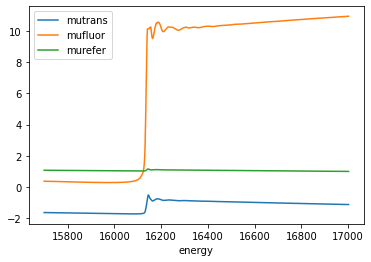

In [20]:
df = view.read()
df.plot(x="energy", y=["mutrans", "mufluor", "murefer"])

# Operation Chains

In [21]:
pull = Pull()
identity = Identity()
standardizegrid = StandardizeGrid(
    x0=15700, 
    xf=17000, 
    nx=1301,
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"]
)
removebackground = RemoveBackground(
    x0=15700, 
    xf=15800, 
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"],
    victoreen_order=0
)
standardizeintensity = StandardizeIntensity(
    x0=15700,
    xf=15800,
    x_column="energy",
    y_columns=["mutrans", "mufluor", "murefer"]
)

In [22]:
pipe0 = Pipeline(
    [
        pull,
        standardizegrid,
        removebackground
    ]
)

In [23]:
d = pipe0.run(view)

<AxesSubplot:xlabel='energy'>

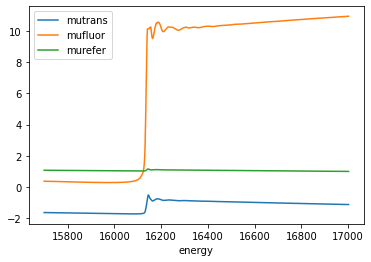

In [24]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [25]:
d["metadata"]["sample"]

{'_id': 'ekNDw7Dr8Ln',
 'name': 'strontium oxide',
 'dataset': 'newville',
 'provenance': {'source': 'newville',
  'url': 'https://github.com/XraySpectroscopy/XASDataLibrary',
  'license': None,
  'description': None},
 'formula': 'SrO',
 'reference': 'SrCO3',
 'prep': 'powder',
 'temperature': 'room temperature'}

In [27]:
d["metadata"]["post_processing"]

{0: {'id': '8dffe2e4-b83c-4323-b40c-f61999e41817',
  'parent': 'ekNDw7Dr8Ln',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Pull',
   '@version': '0.post28.dev0+ga05c7d6'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': 'e61efdad-e2d7-43c6-97fa-bb864287431a'},
  'datetime': '2022-06-10 22:15:09 UTC'},
 1: {'id': '01f6ca32-357e-4e14-8eed-0fbd7a1819f3',
  'parent': '8dffe2e4-b83c-4323-b40c-f61999e41817',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post28.dev0+ga05c7d6',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwargs': {},
   'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer']},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer'],
   'operator_id': '17763beb-8375-4ca2-8b2c-323879f6c9e5',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwa

In [28]:
pipe1 = Pipeline(
    [
        identity,
        standardizegrid,
        standardizeintensity
    ]
)

In [29]:
d = pipe1.run(d)

<AxesSubplot:xlabel='energy'>

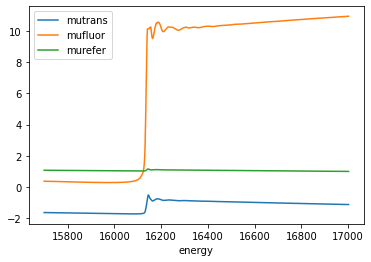

In [30]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [31]:
d["metadata"]["post_processing"]

{0: {'id': '685db28b-52b2-4405-87ac-3b81111ddef1',
  'parent': 'ekNDw7Dr8Ln',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Identity',
   '@version': '0.post28.dev0+ga05c7d6'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': '3b295057-981f-4ff9-8f5e-5e504e53e593'},
  'datetime': '2022-06-10 22:15:23 UTC'},
 1: {'id': '1b8ff48e-05f4-4686-baed-fb331a83b5f7',
  'parent': '685db28b-52b2-4405-87ac-3b81111ddef1',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Identity',
   '@version': '0.post28.dev0+ga05c7d6'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': 'f66dbdf1-d8b1-4581-b4a7-ea5f9c3c8864'},
  'datetime': '2022-06-10 22:15:23 UTC'},
 2: {'id': '00a5b216-5d99-4ced-948c-174b2f927a3d',
  'parent': '1b8ff48e-05f4-4686-baed-fb331a83b5f7',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post28.dev0+ga05c7d6',
   'x0

# Pipeline Chains

In [32]:
pipe2 = Pipeline(
    [
        pull,
        standardizegrid,
    ]
)
pipe3 = Pipeline(
    [
        removebackground,
        standardizeintensity
    ]
)
pipe4 = pipe2 + pipe3

In [33]:
d = pipe4.run(view)

<AxesSubplot:xlabel='energy'>

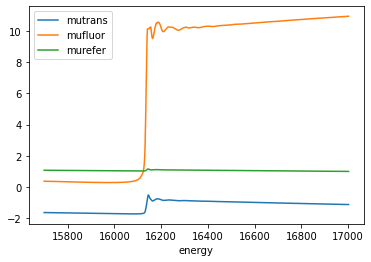

In [34]:
d["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [35]:
d["metadata"]["post_processing"]

{0: {'id': 'a03f9fd3-8429-4f67-8fd5-053897fbca51',
  'parent': 'ekNDw7Dr8Ln',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'Pull',
   '@version': '0.post28.dev0+ga05c7d6'},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mu'],
   'operator_id': 'e61efdad-e2d7-43c6-97fa-bb864287431a'},
  'datetime': '2022-06-10 22:15:26 UTC'},
 1: {'id': 'cb9e7676-02c6-4de2-98fb-f0fa07c08abc',
  'parent': 'a03f9fd3-8429-4f67-8fd5-053897fbca51',
  'operator': {'@module': 'aimm_post_processing.operations',
   '@class': 'StandardizeGrid',
   '@version': '0.post28.dev0+ga05c7d6',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwargs': {},
   'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer']},
  'kwargs': {'x_column': 'energy',
   'y_columns': ['mutrans', 'mufluor', 'murefer'],
   'operator_id': '17763beb-8375-4ca2-8b2c-323879f6c9e5',
   'x0': 15700,
   'xf': 17000,
   'nx': 1301,
   'interpolated_univariate_spline_kwa

# User-defined operator

In [54]:
# All operators are defined based on Operator class
from aimm_post_processing.operations import Operator


### The template for creating user-defined operator ### 
class MyOperator(Operator):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs) 
        # *args and **kwargs are customizable parameters needed for the operator.
        # all extra parameters must be initiated to local attributes.

    def _process_data(self, df):
        """
        Parameters
        ----------
        df : pandas.DataFrame
            The dataframe that has columns such as "energy", "mu", etc.

        Returns
        -------
        df : pandas.DataFrame
            Processed dataframe
        """
        ### Write your code here ###
        
        new_df = df # this line is to be replaced
        
        return new_df


### An example ###
class Shift(Operator):
    """This example shifts the energy grid by x
    """
    def __init__(self, x, x_column="energy", y_columns=["mu"]):
        super().__init__(x_column, y_columns)
        self.x = x
    def _process_data(self, df):
        shift = self.x
        energy_grid = df[self.x_column]
        df[self.x_column] = energy_grid + shift
        return df

In [55]:
client = from_uri("https://aimm.lbl.gov/api")
view = client['dataset']['newville']['uid']['cCv65Ngs86N']

<AxesSubplot:xlabel='energy'>

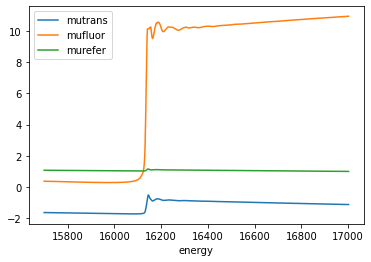

In [56]:
df = view.read()
df.plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [57]:
pull = Pull()
shift_operator = Shift(1000)

In [58]:
data_dict = pull(view)
new_dict = shift_operator(data_dict)

<AxesSubplot:xlabel='energy'>

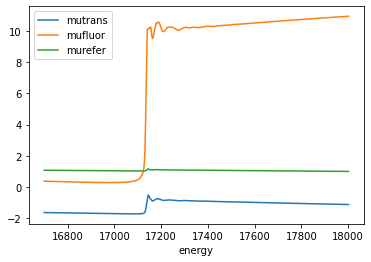

In [59]:
new_dict["data"].plot(x="energy", y=["mutrans", "mufluor", "murefer"])

In [60]:
new_dict["metadata"]["post_processing"]

{'id': '91962b13-ea07-46f2-a163-c6039eb012a4',
 'parent': '8dc576e4-ea57-41e5-84dc-4b2d4f9a524e',
 'operator': {'@module': '__main__',
  '@class': 'Shift',
  '@version': None,
  'x': 1000,
  'x_column': 'energy',
  'y_columns': ['mu']},
 'kwargs': {'x_column': 'energy',
  'y_columns': ['mu'],
  'operator_id': 'b68b0993-8039-455a-a206-eb455c7fa06e',
  'x': 1000},
 'datetime': '2022-06-10 22:54:05 UTC'}